In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from keras.callbacks import Callback

In [2]:
df = pd.read_csv('C:\\Users\\thinh\\Downloads\\data\\train.csv')

In [3]:
df.head()

,userID_hash,month,x0,x1,x2,x3,x4,x5,x6,x7,...,previous_x46,previous_x47,previous_x48,previous_x49,previous_x50,previous_x51,previous_x52,previous_x53,previous_x54,y
0,2d90a44b2d37900619c2398ee3b07c24ae45c9436fb44b...,2022-09,4.000000,4.0,0.0,2.0,2.0,0.0,138000.0,0.0,...,0.0,2.0,2.0,0.0,61000.0,0.0,30500.0,0.0,1.0,177000.0
1,097a3239adb67f3d00fe75338a7e1082363746384dff00...,2022-07,2.090909,11.0,1.0,8.0,8.0,1.0,7087542.0,750000.0,...,0.0,1.0,1.0,0.0,180300.0,0.0,90150.0,0.0,1.0,14893793.0
2,9f9f56fdc788f9a817ec9928309921539a47f6656fe7d6...,2022-07,9.333333,4.0,0.0,3.0,3.0,0.0,267050.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232200.0
3,b5ccb95b3a44bc48b5d8bd819cf48689f756c5c2669619...,2022-10,0.500000,19.0,4.0,7.0,7.0,1.0,1756880.0,453000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410200.0
4,afd48246a21834776f945fc30e10ea7bba1d051b01798d...,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105000.0


In [4]:
df.info

<bound method DataFrame.info of                                                userID_hash    month        x0  \
0        2d90a44b2d37900619c2398ee3b07c24ae45c9436fb44b...  2022-09  4.000000   
1        097a3239adb67f3d00fe75338a7e1082363746384dff00...  2022-07  2.090909   
2        9f9f56fdc788f9a817ec9928309921539a47f6656fe7d6...  2022-07  9.333333   
3        b5ccb95b3a44bc48b5d8bd819cf48689f756c5c2669619...  2022-10  0.500000   
4        afd48246a21834776f945fc30e10ea7bba1d051b01798d...  2022-10       NaN   
...                                                    ...      ...       ...   
1777355  cfeb70397779fdcaeefcdc72a5211a0d8861eab7b4b0aa...  2022-09       NaN   
1777356  2e98ff188fb794d4b4d4dbe5025c3e0ddad5b1c912a593...  2022-09  1.000000   
1777357  d2727d52f9a0cdf020995485f8a91b130bdbe71281bade...  2022-10  0.400000   
1777358  7e585db8ef31d0a79ab5aeaea677b5728249b7e9ac3707...  2022-10       NaN   
1777359  a1773bc1ed26ead93ed2d076ba67d6ec40a5aa59672250...  2022-09  0.250000

In [5]:
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df.iloc[:, 2:])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_imputed)

# Tách features và target
X = data_scaled[:, :-1]
y = data_scaled[:, -1]
y

array([-0.20384012,  5.40518724, -0.18280169, ..., -0.24652681,
       -0.22735744, -0.23013817])

In [6]:

data_imputed = pd.DataFrame(df_imputed, columns=df.iloc[:, 2:].columns)

In [7]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình tuần tự
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

c:\Users\thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
35548/35548 ━━━━━━━━━━━━━━━━━━━━ 27s 732us/step - loss: 0.6594 - val_loss: 0.5352
Epoch 2/15
35548/35548 ━━━━━━━━━━━━━━━━━━━━ 25s 699us/step - loss: 0.5215 - val_loss: 0.5161
Epoch 3/15
35548/35548 ━━━━━━━━━━━━━━━━━━━━ 25s 695us/step - loss: 0.4822 - val_loss: 0.5092
Epoch 4/15
35548/35548 ━━━━━━━━━━━━━━━━━━━━ 25s 689us/step - loss: 0.5127 - val_loss: 0.5350
Epoch 5/15
35548/35548 ━━━━━━━━━━━━━━━━━━━━ 26s 727us/step - loss: 0.4564 - val_loss: 0.5259
Epoch 6/15
35548/35548 ━━━━━━━━━━━━━━━━━━━━ 29s 819us/step - loss: 0.5012 - val_loss: 0.5232
Epoch 7/15
35548/35548 ━━━━━━━━━━━━━━━━━━━━ 29s 823us/step - loss: 0.5287 - val_loss: 0.5143
Epoch 8/15
35548/35548 ━━━━━━━━━━━━━━━━━━━━ 30s 838us/step - loss: 0.4834 - val_loss: 0.5209
Epoch 9/15
35548/35548 ━━━━━━━━━━━━━━━━━━━━ 30s 843us/step - loss: 0.4906 - val_loss: 0.5107
Epoch 10/15
35548/35548 ━━━━━━━━━━━━━━━━━━━━ 30s 841us/step - loss: 0.5060 - val_loss: 0.5125
Epoch 11/15
35548/35548 ━━━━━━━━━━━━━━━━━━━━ 30s 837us/step - loss: 0

In [8]:
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


11109/11109 ━━━━━━━━━━━━━━━━━━━━ 8s 679us/step
Mean Squared Error: 0.5078362473335699
Mean Absolute Error: 0.21029471491099472
R-squared: 0.4506735129862506


Predicted values: [ 0.0259515  -0.11767995 -0.17511773 -0.14671838 -0.09157515]
True values: [-0.16591758 -0.27130033 -0.26215318 -0.25203034 -0.2255646 ]


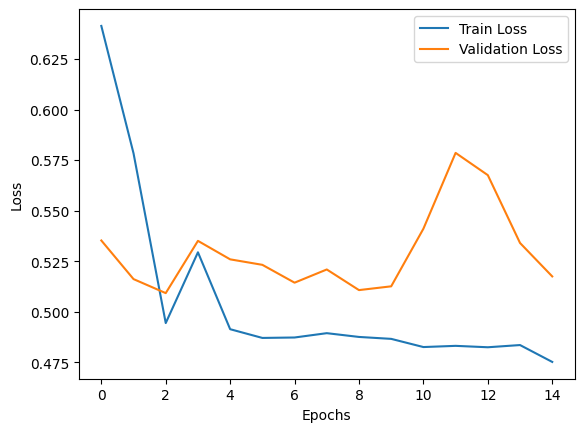

In [9]:
# In ra một vài giá trị dự đoán
print(f'Predicted values: {y_pred[:5]}')
print(f'True values: {y_test[:5]}')

# Vẽ biểu đồ loss và val_loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()